
## 데이터셋 출처
* https://dacon.io/competitions/open/235538/data


### 데이터 구성
#### FIFA_train.csv / FIFA_test.csv
* id : 선수 고유의 아이디
* name : 이름
* age : 나이
* continent : 선수들의 국적이 포함되어 있는 대륙입니다
* contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
* position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
* prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
* reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
* stat_overall : 선수의 현재 능력치 입니다.
* stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
* stat_skill_moves : 선수의 개인기 능력치 입니다.
* value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다

#### submission.csv
* id : 선수 고유의 아이디
* value : 예측된 선수 이적 시장 가격을 기입 

## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
train = pd.read_csv('data/fifa/FIFA_train.csv')
test = pd.read_csv('data/fifa/FIFA_test.csv')
submission  = pd.read_csv('data/fifa/submission.csv')

In [3]:
train.shape, test.shape

((8932, 12), (3828, 11))

In [4]:
train.head(2)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0


In [5]:
test.head(2)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [8]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [9]:
set(train.columns) - set(test.columns)

{'value'}

# 데이터 EDA

In [10]:
train.nunique()

id                  8932
name                8932
age                   25
continent              5
contract_until        17
position               4
prefer_foot            2
reputation             5
stat_overall          46
stat_potential        45
stat_skill_moves       5
value                198
dtype: int64

In [11]:
test.nunique()

id                  3828
name                3828
age                   26
continent              5
contract_until        18
position               4
prefer_foot            2
reputation             5
stat_overall          47
stat_potential        43
stat_skill_moves       5
dtype: int64

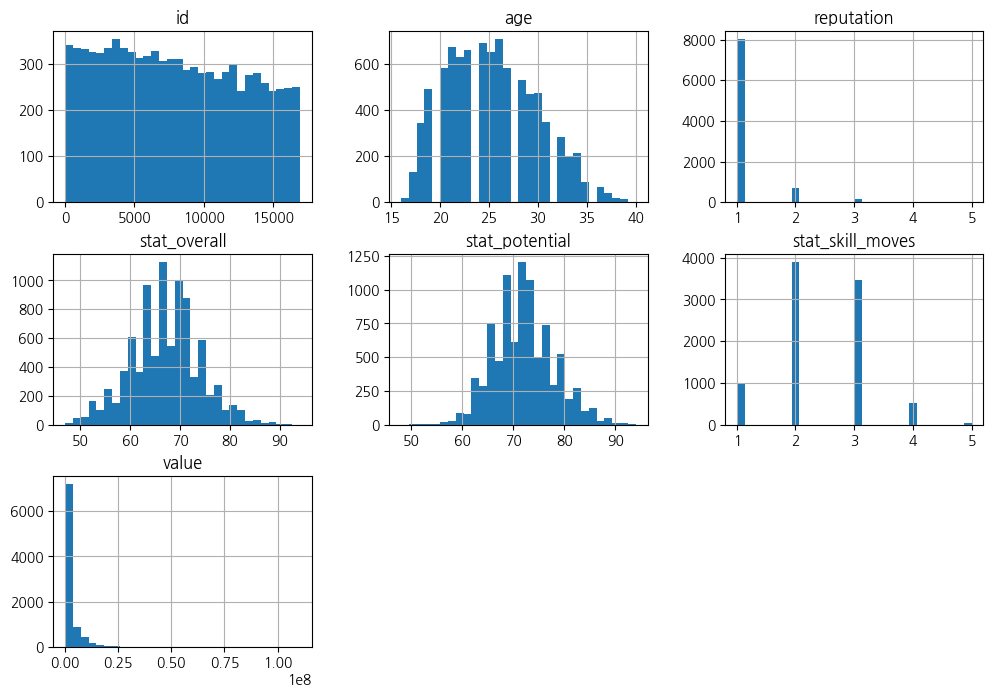

In [12]:
train.hist(figsize=(12,8), bins=30);
# reputation이랑 stat_skill_moves는 범주형

C:\Users\82104\AppData\Local\Temp\ipykernel_6504\2308318391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
C:\Users\82104\AppData\Local\Temp\ipykernel_6504\2308318391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train.corr()))
C:\Users\82104\AppData\Local\Temp\ipykernel_6504\2308318391.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap="coolwarm", mask=mask, annot = True)


<AxesSubplot: >

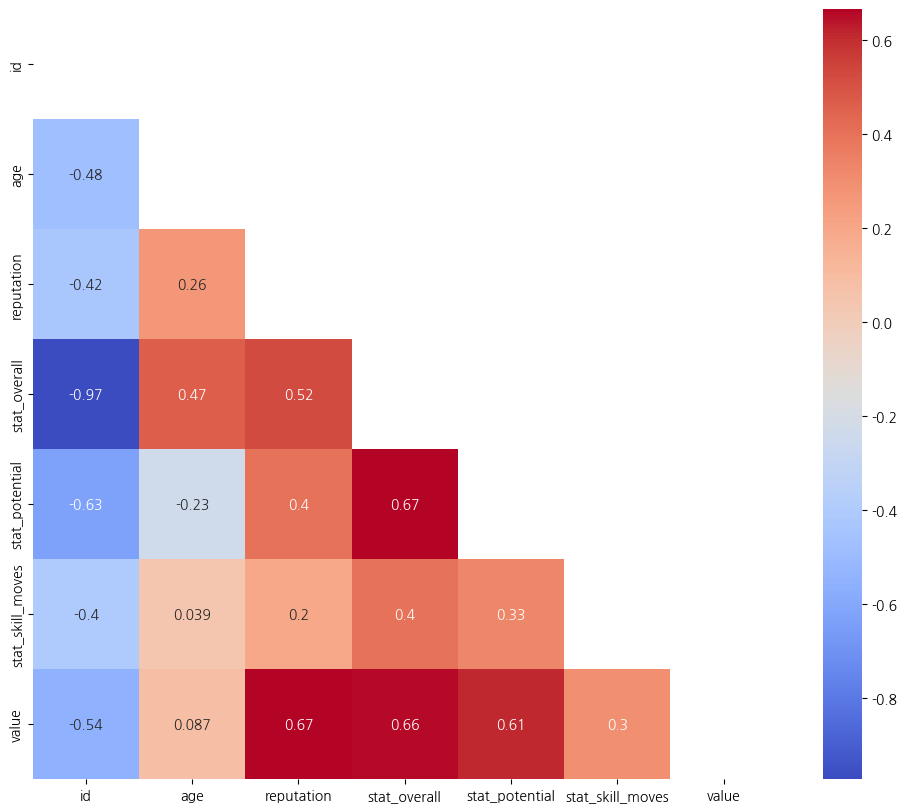

In [13]:
corr = train.corr()
mask = np.triu(np.ones_like(train.corr()))
plt.figure(figsize=(12,10)) #그래프 사이즈 조절
sns.heatmap(train.corr(), cmap="coolwarm", mask=mask, annot = True)

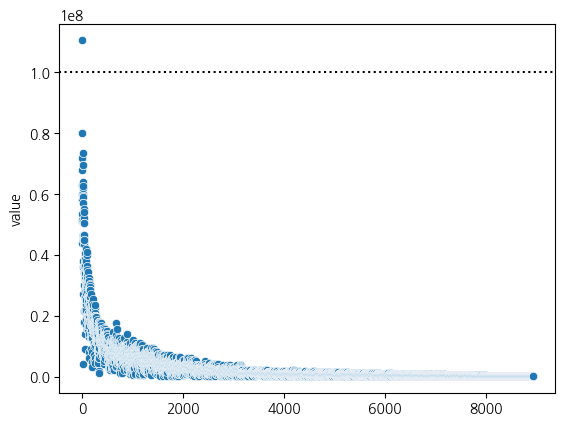

In [14]:
sns.scatterplot(data=train, x=train.index, y="value")
plt.axhline(100000000, c="k", ls=":")

In [15]:
train[train.value == 110500000]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0


In [16]:
train["prefer_foot"].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

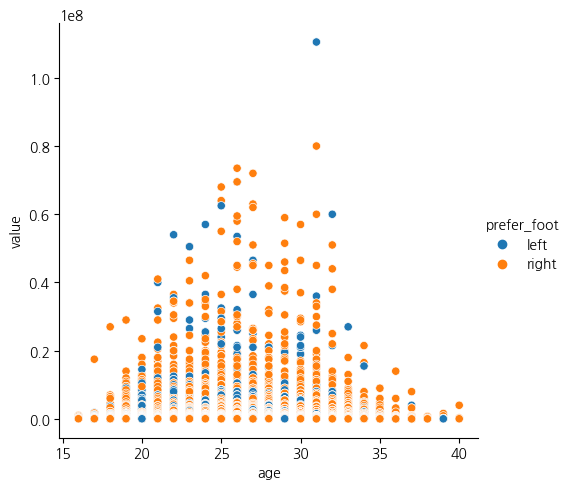

In [17]:
sns.relplot(data=train,x="age",y="value",hue="prefer_foot")

<AxesSubplot: xlabel='stat_potential', ylabel='value'>

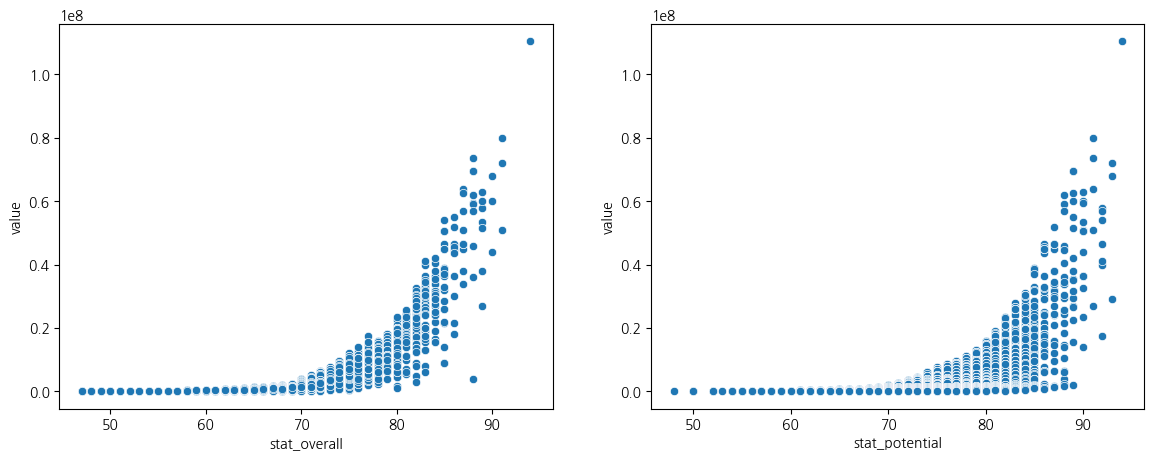

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.scatterplot(data=train, x="stat_overall",y="value",ax=axes[0])
sns.scatterplot(data=train, x="stat_potential",y="value", ax=axes[1])

# 데이터 전처리

In [19]:
# 불필요한 컬럼 제거
train.drop(['id', 'name'], axis = 1, inplace = True)
test.drop(['id', 'name'], axis = 1, inplace = True)

In [20]:
train["contract_until"].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [21]:
#contract_until 변수 int 형으로 변환
# 계약 연도만 추출
def func(string:object) -> int:
    """계약 연도만 추출하여 int로 반환"""
    string = string[-4:]
    return int(string)


train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

## 인코딩

In [22]:
train.continent.unique()

array(['south america', 'europe', 'africa', 'asia', 'oceania'],
      dtype=object)

In [23]:
train.position.unique()

array(['ST', 'GK', 'DF', 'MF'], dtype=object)

In [25]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [26]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

## 학습 데이터셋 나누기

In [27]:
label_name = "value"
feature_names = ['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves']
train[feature_names].head(2)

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,south america,2021,ST,left,5.0,94,94,4.0
1,27,europe,2020,GK,right,4.0,91,93,1.0


In [29]:
#원핫인코딩

X_train = pd.get_dummies(train[feature_names])
print(X_train.shape)
display(X_train.head(2))

X_test = pd.get_dummies(test[feature_names])
print(X_test.shape)
display(X_test.head(2))

y_train= train[label_name]
print(y_train.shape)
y_train.head(2)

(8932, 17)


,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,31,2021,5.0,94,94,4.0,0,0,0,0,1,0,0,0,1,1,0
1,27,2020,4.0,91,93,1.0,0,0,1,0,0,0,1,0,0,0,1


(3828, 17)


,age,contract_until,reputation,stat_overall,stat_potential,stat_skill_moves,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,33,2022,5.0,94,94,5.0,0,0,1,0,0,0,0,0,1,0,1
1,26,2022,5.0,92,93,5.0,0,0,0,0,1,0,0,0,1,0,1


(8932,)


0    110500000.0
1     72000000.0
Name: value, dtype: float64

In [30]:
set(X_test.columns) == set(X_train.columns)

True

## 검증용 데이터셋 나누기

In [31]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

# 랜덤포레스트

In [32]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state = 42)
model_rf

RandomForestRegressor(random_state=42)

In [33]:
#랜덤포레스트 점수 계산
from sklearn.model_selection import cross_val_predict
y_valid_pred = cross_val_predict(model_rf, X_train, y_train, cv=kf, n_jobs=-1)
rmse = np.square(y_train - y_valid_pred).mean() ** 0.5
rmse

938132.4488388906

<AxesSubplot: xlabel='value'>

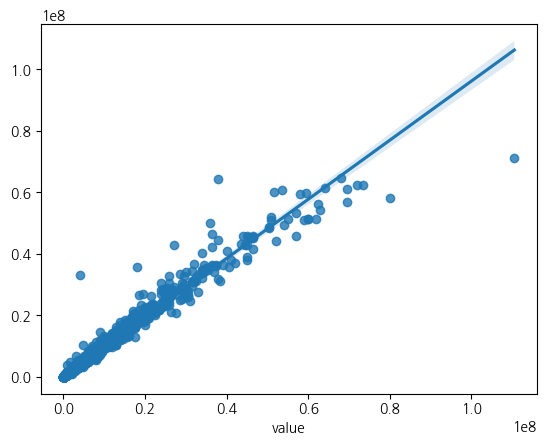

In [34]:
sns.regplot(x=y_train, y=y_valid_pred)

## 학습

In [35]:
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_test)
y_predict[:5]

array([76790000., 76580000., 68260000., 71725000., 61705000.])

In [36]:
y_predict.shape

(3828,)

<AxesSubplot: >

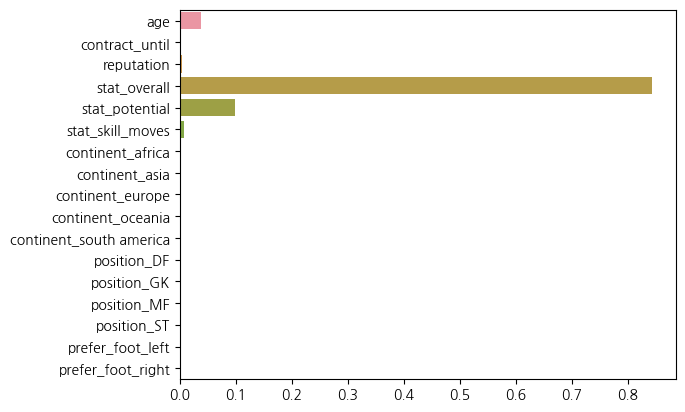

In [37]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model_rf.feature_importances_, y=model_rf.feature_names_in_)

In [38]:
submission['value'] = y_predict
submission.to_csv(f'data/fifa/submit_model_{rmse}.csv',index = False) 

# Gradient Boosting Model

In [39]:
# sklearn.ensemble의 GradientBoostingRegressor
# model_gbt
from sklearn.ensemble import GradientBoostingRegressor
model_gbt = GradientBoostingRegressor(random_state = 42, n_estimators=200, learning_rate=0.9)
model_gbt

GradientBoostingRegressor(learning_rate=0.9, n_estimators=200, random_state=42)

In [40]:
# 모델을 학습시킵니다.
model_gbt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.9, n_estimators=200, random_state=42)

In [41]:
y_predict = model_gbt.predict(X_test)

In [42]:
submission['value'] = y_predict
submission.to_csv(f'data/fifa/submit_model_gbt.csv',index = False) #953051.37398 212위

In [43]:
#랜덤포레스트 점수 계산
from sklearn.model_selection import cross_val_predict
y_valid_pred = cross_val_predict(model_gbt, X_train, y_train, cv=kf, n_jobs=-1)
rmse = np.square(y_train - y_valid_pred).mean() ** 0.5
rmse

1014868.7526163356

# Catboost

In [45]:
# 코드 공유 참고
from catboost import CatBoostRegressor
cb = CatBoostRegressor(random_state = 42, silent = True, depth = 3)
# cb = CatBoostRegressor(random_state = 42)

In [48]:
#cat boost점수
from sklearn.model_selection import cross_val_predict
y_valid_pred = cross_val_predict(cb, X_train, y_train, cv=kf, n_jobs=-1)
rmse = np.square(y_train - y_valid_pred).mean() ** 0.5
rmse

612471.1589125897

In [49]:
cb.fit(X_train, y_train)
y_predict = cb.predict(X_test)

In [50]:
submission['value'] = y_predict
submission.to_csv(f'data/fifa/submit_cb4.csv',index = False) 
#catboost 147위